This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
mnist.load_data?
# grayscale : 0 - 255

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [12]:
train_images = train_images.reshape((60000, 28 * 28)) # (60000, 784)
train_images = train_images.astype("float32") / 255   # model converges faster -> 성능(+)
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [13]:
print(train_images.shape)
# train_images[0]

(60000, 784)


**"Fitting" the model**

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=100)
# ( 1 epoch 당 100 batch size씩 600번 학습 ) * 5
# batch : randomly shuffle (+)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8775 - loss: 0.4186
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9687 - loss: 0.1077
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9789 - loss: 0.0674
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0484
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9896 - loss: 0.0341


In [15]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9942 - loss: 0.0226
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9951 - loss: 0.0167
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9970 - loss: 0.0125
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9981 - loss: 0.0087
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9987 - loss: 0.0062


**Using the model to make predictions**

In [16]:
test_images.shape

(10000, 784)

In [17]:
test_digits = test_images[0:5]
predictions = model.predict(test_digits)
print(predictions.shape)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
(5, 10)


array([4.4192211e-10, 7.5112395e-11, 1.6994493e-07, 8.2178822e-06,
       1.2885618e-13, 1.1320766e-10, 7.6307021e-15, 9.9999142e-01,
       1.8032485e-10, 2.7109249e-07], dtype=float32)

In [18]:
predictions[0].argmax()

np.int64(7)

In [19]:
predictions[0][7]

np.float32(0.9999914)

In [20]:
test_labels[0]

np.uint8(7)

In [21]:
len(model.weights)

4

In [22]:
model.weights[0].shape # dimension flipped 된 이유? tensor 내부 동작 -> xW (O), Wx (X)

TensorShape([784, 512])

**Evaluating the model on new data**

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9791 - loss: 0.0798
test_acc: 0.9821000099182129


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [24]:
import numpy as np
x = np.array(12)
x

array(12)

In [25]:
print(x.ndim, x.shape)

0 ()


### Vectors (rank-1 tensors)

In [26]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [27]:
print(x.ndim, x.shape)

1 (5,)


### Matrices (rank-2 tensors)

In [28]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x.ndim, x.shape)

2 (3, 5)


### Rank-3 and higher-rank tensors

In [29]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print(x.ndim, x.shape)

3 (3, 3, 5)


### Key attributes

In [30]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
train_images.ndim

3

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

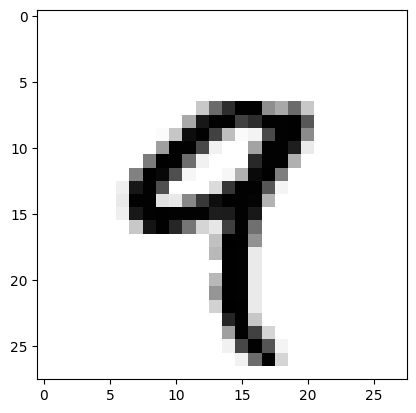

In [34]:
import matplotlib.pyplot as plt
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [35]:
train_labels[4]

np.uint8(9)

### Manipulating tensors in NumPy

In [36]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [38]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [39]:
my_slice = train_images[:, 14:, 14:]

In [40]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice

array([[[ 49, 238, 253, ...,  93,  82,  82],
        [ 18, 219, 253, ...,   0,   0,   0],
        [  0,  80, 156, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 207,   2],
        [  0,   0,   0, ..., 250, 182,   0],
        [  0,   0,   0, ...,  78,   0,   0]],

       [[  0,   0,   0, ...,  84, 252, 253],
        [  0,   0,   0, ...,  96, 189, 253],
        [  0,   0,   0, ...,  47,  79, 255],
        ...,
        [252, 145,   0, ..., 252, 173,   0],
        [253, 225,   0, ..., 162,   0,   0],
        [252, 249, 146, ...,  56,   0,   0]],

       [[  0,   0,   0, ...,   0,   2, 153],
        [  0,   0,   0, ...,   0,  27, 254],
        [  0,   0,   0, ...,   0, 183, 254],
        ...,
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 255,  94,   0]],

       ...,

       [[  0,   0,   0, ..., 223, 159, 131],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,  54, ...,   0,   0,   0

### The notion of data batches

In [41]:
batch = train_images[:128]

In [42]:
batch = train_images[128:256]

In [43]:
n = 2
batch = train_images[128 * n:128 * (n + 1)]
print(128 * n, 128 * (n + 1))

256 384


## **~ 03/13 (week2)**

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## **week3 (03/20~)**

## The gears of neural networks: tensor operations

### Element-wise operations

In [44]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [80]:
import numpy as np
ab = np.ones((2,2))
ab[0, 0] = 5
ab[1, 1] = -1

print(ab)
naive_relu(ab)

[[ 5.  1.]
 [ 1. -1.]]


array([[5., 1.],
       [1., 0.]])

In [45]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [46]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.05 s


In [47]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.94 s


### Broadcasting

In [82]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [83]:
y = np.expand_dims(y, axis=0)
y

array([[0.65488601, 0.43418678, 0.27002824, 0.02172727, 0.10567403,
        0.22013134, 0.4739496 , 0.50669223, 0.03547711, 0.50617357]])

In [84]:
Y = np.concatenate([y] * 32, axis=0)
Y

array([[0.65488601, 0.43418678, 0.27002824, 0.02172727, 0.10567403,
        0.22013134, 0.4739496 , 0.50669223, 0.03547711, 0.50617357],
       [0.65488601, 0.43418678, 0.27002824, 0.02172727, 0.10567403,
        0.22013134, 0.4739496 , 0.50669223, 0.03547711, 0.50617357],
       [0.65488601, 0.43418678, 0.27002824, 0.02172727, 0.10567403,
        0.22013134, 0.4739496 , 0.50669223, 0.03547711, 0.50617357],
       [0.65488601, 0.43418678, 0.27002824, 0.02172727, 0.10567403,
        0.22013134, 0.4739496 , 0.50669223, 0.03547711, 0.50617357],
       [0.65488601, 0.43418678, 0.27002824, 0.02172727, 0.10567403,
        0.22013134, 0.4739496 , 0.50669223, 0.03547711, 0.50617357],
       [0.65488601, 0.43418678, 0.27002824, 0.02172727, 0.10567403,
        0.22013134, 0.4739496 , 0.50669223, 0.03547711, 0.50617357],
       [0.65488601, 0.43418678, 0.27002824, 0.02172727, 0.10567403,
        0.22013134, 0.4739496 , 0.50669223, 0.03547711, 0.50617357],
       [0.65488601, 0.43418678, 0.2700282

In [51]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [52]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [53]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [54]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [55]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [56]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [57]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [58]:
train_images = train_images.reshape((60000, 28 * 28))

In [81]:
tr2 = train_images.reshape((60000, 28, 28))
tr2.shape

(60000, 28, 28)

In [59]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [60]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [61]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [87]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [85]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [90]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.3969227, 1.3969227],
        [1.5046474, 1.5046474]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [92]:
# Q1
x = tf.Variable(2.)
y = tf.Variable(1.)
with tf.GradientTape() as tape:
    fx = x * x * y + x * y + 3 * y
grad_of_fx_wrt_x_and_y = tape.gradient(fx, [x, y])
grad_of_fx_wrt_x_and_y

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>]

In [ ]:
# Q2, Q3
x = tf.constant(np.array([1.,4.,3.]).reshape(1,3), dtype=tf.float32)
W = tf.Variable(tf.random.uniform((3, 2)), dtype=tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype=tf.float32)


## Looking back at our first example

In [65]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [66]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [67]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [68]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8707 - loss: 0.4413
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9660 - loss: 0.1184
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9776 - loss: 0.0740
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9842 - loss: 0.0512
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0382


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [69]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [93]:
exD = NaiveDense(input_size=5, output_size=10, activation=tf.nn.relu)
exD.weights

[<tf.Variable 'Variable:0' shape=(5, 10) dtype=float32, numpy=
 array([[0.07534709, 0.01238179, 0.0515936 , 0.03319288, 0.00264485,
         0.09580328, 0.02987555, 0.05694073, 0.08030249, 0.05386807],
        [0.08917928, 0.01667755, 0.04726075, 0.04300164, 0.07865448,
         0.05340178, 0.01515343, 0.02836156, 0.09363817, 0.05448742],
        [0.01733902, 0.02778029, 0.03553174, 0.08523565, 0.02428104,
         0.07796704, 0.07230029, 0.05984161, 0.08738206, 0.03688033],
        [0.01903193, 0.09226378, 0.0423599 , 0.07464913, 0.03185621,
         0.00132226, 0.01317766, 0.05049391, 0.03722898, 0.07088995],
        [0.03229212, 0.03222544, 0.09837601, 0.02581063, 0.05787908,
         0.01248277, 0.05586305, 0.04328829, 0.01263379, 0.00700113]],
       dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [94]:
print(exD.weights[0].shape) # W
exD.weights[0]

(5, 10)


<tf.Variable 'Variable:0' shape=(5, 10) dtype=float32, numpy=
array([[0.07534709, 0.01238179, 0.0515936 , 0.03319288, 0.00264485,
        0.09580328, 0.02987555, 0.05694073, 0.08030249, 0.05386807],
       [0.08917928, 0.01667755, 0.04726075, 0.04300164, 0.07865448,
        0.05340178, 0.01515343, 0.02836156, 0.09363817, 0.05448742],
       [0.01733902, 0.02778029, 0.03553174, 0.08523565, 0.02428104,
        0.07796704, 0.07230029, 0.05984161, 0.08738206, 0.03688033],
       [0.01903193, 0.09226378, 0.0423599 , 0.07464913, 0.03185621,
        0.00132226, 0.01317766, 0.05049391, 0.03722898, 0.07088995],
       [0.03229212, 0.03222544, 0.09837601, 0.02581063, 0.05787908,
        0.01248277, 0.05586305, 0.04328829, 0.01263379, 0.00700113]],
      dtype=float32)>

#### A simple Sequential class

In [70]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [71]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
# w1, b1, w2, b2
assert len(model.weights) == 4

#### A batch generator

In [72]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [73]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [74]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [75]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [76]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch) # update weights & return avg loss
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [77]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 6.97
loss at batch 100: 2.21
loss at batch 200: 2.18
loss at batch 300: 2.07
loss at batch 400: 2.20
Epoch 1
loss at batch 0: 1.91
loss at batch 100: 1.86
loss at batch 200: 1.80
loss at batch 300: 1.69
loss at batch 400: 1.81
Epoch 2
loss at batch 0: 1.59
loss at batch 100: 1.56
loss at batch 200: 1.48
loss at batch 300: 1.41
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.33
loss at batch 100: 1.33
loss at batch 200: 1.22
loss at batch 300: 1.20
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.15
loss at batch 200: 1.03
loss at batch 300: 1.04
loss at batch 400: 1.12
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.01
loss at batch 200: 0.90
loss at batch 300: 0.92
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.89
loss at batch 100: 0.90
loss at batch 200: 0.79
loss at batch 300: 0.83
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.81
loss at batch 100: 0.82
loss at batch 200: 0.72
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [78]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


In [ ]:
# naive model의 경우, keras ver. 보다 훨씬 성능이 떨어짐
# -> initialize w/b with random uniform values
# -> There are some theory for initializing (Keras does.)
# -> batch generator : no shuffling for each epoch in naive ver.
# -> loss function : SGD < ADAM, ADAMW (rmsprop)

## Summary